In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# Lattice
N = 7
S = np.zeros((N+2,N+2))
J = 1 

# Steps
Ntr = 10
Nsteps = 100


In [4]:
for i in range(1,N+1):
    for j in range(1,N+1):
        temp = np.random.random()
        if temp>1/2:
            S[i,j]=1
        else:
            S[i,j]=-1

In [5]:
# Impose periodic boundary conditions
#S[0,:] = S[N,:]
#S[N+1,:] = S[1,:]
#S[:,0] = S[:,N]
#S[:,N+1]= S[:,1]

In [6]:
S

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1., -1., -1., -1., -1., -1.,  0.],
       [ 0., -1.,  1.,  1., -1., -1., -1.,  1.,  0.],
       [ 0., -1.,  1., -1.,  1.,  1., -1., -1.,  0.],
       [ 0., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0., -1., -1.,  1.,  1., -1., -1., -1.,  0.],
       [ 0., -1.,  1., -1., -1., -1., -1., -1.,  0.],
       [ 0.,  1., -1., -1.,  1., -1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [7]:
# Choose temperature range
Ti = 7
dT = 0.1
Tf = 0.1

In [8]:
counter=0
T=Ti
Temp=[Ti]
M=[sum(sum(S))]


In [9]:
while T>Tf:
    mag=0

    #Transitory period
    for k in range(1,Ntr):
        x = int(np.round(1+(N-1)*np.random.random()))
        y = int(np.round(1+(N-1)*np.random.random()))

        DE = 4*J*S[x,y]*(S[x-1,y]+S[x,y-1]+S[x+1,y]+S[x,y+1])
        P = np.exp( -DE/Temp[counter])

        if P > np.random.random():
            S[x,y]=-S[x,y]
        
    #Transitory period
    for k in range(1,Nsteps):
        for j in range(1,N**2):
            x = int(np.round(1+(N-1)*np.random.random()))
            y = int(np.round(1+(N-1)*np.random.random()))

            DE = 4*J*S[x,y]*(S[x-1,y]+S[x,y-1]+S[x+1,y]+S[x,y+1])
            P = np.exp( -DE/Temp[counter])

            if P>np.random.random():
                S[x,y]=-S[x,y]
        mag = mag+S
    
    counter = counter+1
    Temp.append(T-dT)
    T = T - dT

    M.append(sum(sum(mag[1:N+1,1:N+1]))/Nsteps)

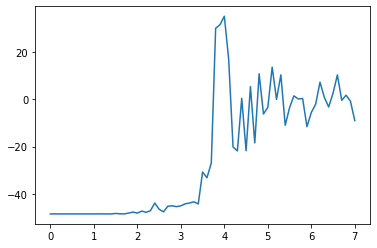

In [10]:
plt.figure()
plt.plot(Temp,M)

In [12]:
# T scade -> numarul de spin flips acceptati este din ce in ce mai mic
# pentru ca e defavorabil energetic

# T scade -> accepti doar acele stari care scad energia

# T scade -> distributia energiilor starilor pe care le parcurgi cu MC v a
# fi din ce in ce mai ingusta. 